# Chi-square distribution

Wikipedia: the chi-square distribution (also chi-squared or χ2-distribution) with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import time
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from itertools import count
%matplotlib inline
from IPython.display import HTML

1. The origin is a normal distribution

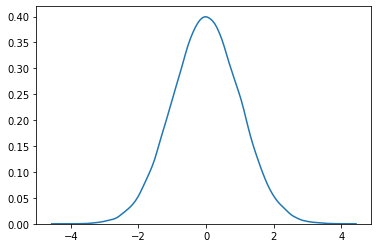

In [4]:
# From standard normal distribution
normal_data = np.random.normal(size = 100000)
sns.distplot(normal_data, hist=False);

(0, 15)

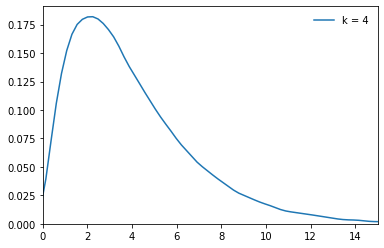

In [18]:
np.random.seed(204)
k = 4 #degree of freedom, actually the sample size
m = 100000 #how many times to reapeat the sampling to create a distribution
data = np.random.normal(size=(k, m))
chi = np.power(data,2).sum(axis=0)

#visualization
sns.distplot(chi, hist=False, label=f'k = {k}')
plt.legend(frameon=False)
plt.gca().set_xlim(0,15)

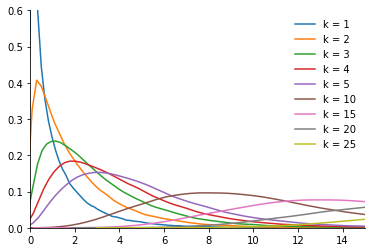

In [27]:
np.random.seed(104)
m = 100000 #number of times to get the sample
k = [1,2,3,4,5,10,15,20,25]
fig2 = plt.figure()
for i in k:
    data = np.random.normal(size = (i, m))
    chi = np.power(data,2).sum(axis=0)
    sns.distplot(chi, hist=False, label=f'k = {i}')
    ax = fig2.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(0,15)
    ax.set_ylim(0,0.6)
plt.legend(frameon=False);

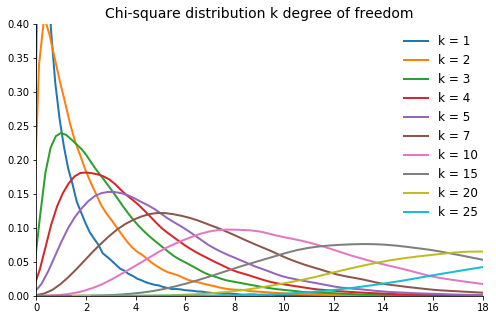

In [28]:
np.random.seed(122)
m = 100000  # number of times to retriev k size sample
k = [1, 2, 3, 4, 5, 7, 10, 15, 20, 25]

fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xlim=(0, 6), ylim=(0, 1))
ax.set_title('Chi-square distribution k degree of freedom', fontsize=14)


def init():
    '''initialize the axis within the anim object instance'''
    ax.set_title('Chi-square distribution k degree of freedom', fontsize=14)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 0.4)


def animate(i):
    '''this function creates the chi distribution for the anim object instance'''
    if (i) % 11 == 0:  # this part provides a small pause between plottings
        plt.gca().clear()
        ax.set_xlim(0, 18)
        ax.set_ylim(0, 0.4)
        ax.set_title(
            'Chi-square distribution with k degree of freedom', fontsize=14)
    else:
        data = np.random.normal(size=(k[i-1], m))
        chi = np.power(data, 2).sum(axis=0)
        sns.distplot(chi, hist=False,
                     label=f'k = {k[i-1]}', ax=ax, kde_kws={'linewidth': 2})
        plt.legend(frameon=False, loc='upper left',
                   bbox_to_anchor=(0.8, 1), fontsize=12)


anim = FuncAnimation(fig, animate, interval=400,
                     frames=range(0, 11), repeat=True, init_func=init)

HTML(anim.to_jshtml())